# DATA SCIENCE FOR HEALTHCARE 

# ASTON HACKERS 

## Team members : 
### Nazrana Perween
### Keerthana Devanahalli Nagabhushana
### Syed Naqui Ali
### Jagadeesh Jothi Selvaraj

In [57]:
#importing pandas library 
import pandas as pd

In [58]:
#importing the dataset
df=pd.read_csv("df_train.csv")

C:\Users\syedn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [59]:
#finding the null values in the dataset 
df.isnull().values.any()

True

In [60]:
#gives the fisrt five entries of the datset 
df.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
0,P23253.1:2,5693,P23253.1,24,Y,1378212,75914,"9606,9986",0,2,...,-6.534201,-23.461905,-2.026497,-10.976587,10.632502,1.899121,5.987014,22.757457,-6.143911,-1.136779
1,P23253.1:2,5693,P23253.1,25,S,1378212,75914,"9606,9986",0,2,...,-4.392078,-1.733373,7.224207,-2.539621,8.304244,-0.358899,5.584130,17.243431,-6.938871,-8.858502
2,P23253.1:2,5693,P23253.1,26,V,1378212,75914,"9606,9986",0,2,...,-7.734902,1.585801,-2.086515,3.191944,1.550936,5.611089,2.161179,9.840781,-2.644685,-10.233049
3,P23253.1:2,5693,P23253.1,27,D,1378212,75914,"9606,9986",0,2,...,-9.555528,0.306586,-2.501868,2.321484,2.366742,5.858835,2.451758,10.419416,-1.646064,-10.823489
4,P23253.1:2,5693,P23253.1,28,D,1378212,75914,"9606,9986",0,2,...,-7.413021,5.494316,5.306029,4.775133,-2.842552,-1.012134,-0.069497,19.691379,1.410738,-11.099221


# Finding Null values in the dataset

In [61]:
#shows all the columns which contain missing values 
df.isnull().sum()

Info_PepID                          0
Info_organism_id                    0
Info_protein_id                     0
Info_pos                            0
Info_AA                             0
                                   ..
feat_local_ScalesGap_scl4.2.lag3    0
feat_local_ScalesGap_scl5.2.lag3    0
feat_local_ScalesGap_scl4.3.lag3    0
feat_local_ScalesGap_scl5.3.lag3    0
feat_local_ScalesGap_scl5.4.lag3    0
Length: 399, dtype: int64

### In this particular column we have 75843 number of null values which we will fix because it adds ambiguity to the analysis process  

In [62]:
df['Info_pubmed_id'].isnull().sum()

75843

### Importing the random library,we generate random numbers to fill the null values present in the column. 

In [63]:
import random
import numpy as np
df['Info_pubmed_id'] = df['Info_pubmed_id'].replace(np.nan, random.randint(0,1))

### After executing the above step, we see there are zero null values present in the specific column. 

In [64]:
df.isnull().sum().sum()

0

### Length of all epitopes in info_window column is 15 

In [65]:
df["Info_window"].str.len()

0        15
1        15
2        15
3        15
4        15
         ..
76735    15
76736    15
76737    15
76738    15
76739    15
Name: Info_window, Length: 76740, dtype: int64

### In our dataset we see huge imbalance of different type of epitopes which is represented in the histogram below. 

-1    75709
 1     1031
Name: Class, dtype: int64

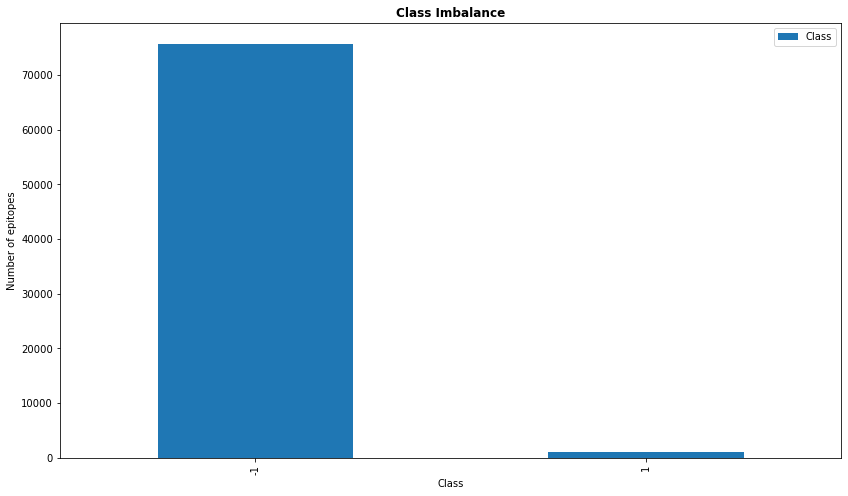

In [66]:
import matplotlib.pyplot as plot
df['Class'].value_counts().plot(kind='bar',figsize=(14,8),legend=True)
plot.xlabel('Class')
plot.ylabel('Number of epitopes')
plot.title('Class Imbalance',fontweight ="bold")
df['Class'].value_counts()

### There are multiple level of dependencies in the data , the most relevant one is the column Info_cluster 

([], [])

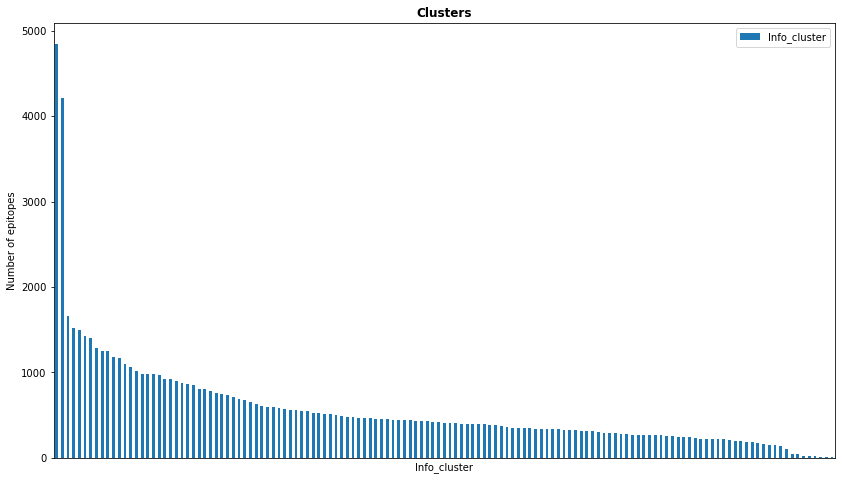

In [67]:
import matplotlib.pyplot as plot
df['Info_cluster'].value_counts().plot(kind='bar',figsize=(14,8),legend=True)
plot.xlabel('Info_cluster')
plot.ylabel('Number of epitopes')
plot.title('Clusters',fontweight ="bold")
df['Info_cluster'].value_counts()
plot.xticks([])


### The figure depicts that amino acids in Class -1 appear more frequently than Class 1.

Text(0.5, 1.0, 'Frequency of aminoacid letters')

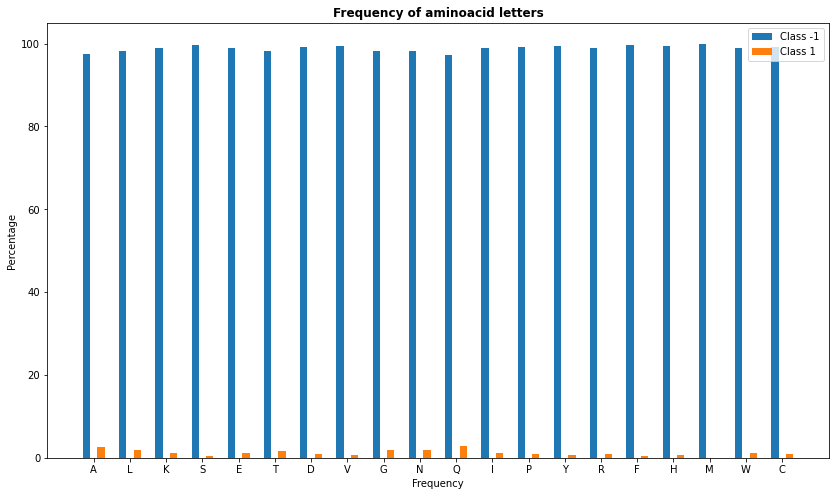

In [68]:
""" A grouped bar chart of the frequencies (%) of each aminoacid letter in 
Positive vs Negative observations"""

import numpy as np
class_df0 = df[df['Class'] == -1]
class_df1 = df[df['Class'] == 1]

"""Calculating the number of aminoacid letters in each class"""
Y = pd.Series(list(class_df1.Info_AA.str.cat()), name = 'Characters').value_counts()
X = pd.Series(list(class_df0.Info_AA.str.cat()), name = 'Characters').value_counts()
Z = pd.Series(list(df.Info_AA.str.cat()), name = 'Observations').value_counts()

"""Calculating the percentage of aminoacid letters in each class"""
y = pd.Series(((Y/Z)*100).round(decimals = 2), name = 'Class:1')
z = pd.Series(((X/Z)*100).round(decimals = 2), name = 'Class:-1')

"""Appending all values in a dataframe"""
m4d=pd.DataFrame()
m4d['class -1'] = z 
m4d['class1'] = y
#m4d['class1'] = m4d['class1'].fillna(0)

"""Plotting the group bar chart"""
x = np.arange(20)
plot.figure(figsize=(14,8))
plot.bar(x-0.2,m4d['class -1'],0.2)
plot.bar(x+0.2,m4d['class1'],0.2)
plot.xticks(x, ['A','L','K','S','E','T','D','V','G','N','Q','I','P','Y','R','F','H','M','W','C'])
plot.legend(labels=['Class -1', 'Class 1'])
plot.xlabel('Frequency')
plot.ylabel('Percentage')
plot.title('Frequency of aminoacid letters',
          fontweight ="bold")

### using the GroupShuffleSplit, we are splitting the data into train and test based on Info_split. 

In [69]:
from sklearn.model_selection import GroupShuffleSplit
splitter = GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 7)
split = splitter.split(df, groups=df['Info_split'])
train_inds, test_inds = next(split)

train = df.iloc[train_inds]
test = df.iloc[test_inds]

In [70]:
#dropping the columns which are not necessary in test set 
test =test.drop(columns=['Info_PepID', 'Info_organism_id', 'Info_protein_id', 'Info_pos',
       'Info_AA', 'Info_pubmed_id', 'Info_epitope_id', 'Info_host_id',
       'Info_nPos', 'Info_nNeg','Info_window','Info_cluster','Info_split'])

In [71]:
#dropping the columns which are not necessary in train set.
train =train.drop(columns=['Info_PepID', 'Info_organism_id', 'Info_protein_id', 'Info_pos',
       'Info_AA', 'Info_pubmed_id', 'Info_epitope_id', 'Info_host_id',
       'Info_nPos', 'Info_nNeg','Info_window','Info_cluster','Info_split'])

In [72]:
#Printing the shape of train dataset
train.shape

(38377, 386)

In [73]:
#Printing the shape of test dataset
test.shape

(38363, 386)

# Using PCA Analysis on our train dataset 

In [74]:
"""Projecting original data to 2 dimensional data using PCA"""
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(train)
df_pca=pca.transform(train)
print(train.shape)
print(df_pca.shape)

(38377, 386)
(38377, 2)


### The graph depicted below is after performing PCA Analysis. 

Text(0.5, 1.0, 'PCA')

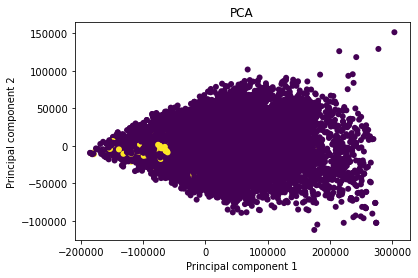

In [75]:
"""Plotting after PCA"""
import matplotlib.pyplot as plt
plt.scatter(df_pca[:,0],df_pca[:,1],
c=train['Class'],edgecolor='none')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA')

In [76]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

### Dropping the class column which is the target variable and retaining only the feature variables for the training purpose. 

In [77]:
#Creating x_train values
x_train = train.drop(columns ='Class')

### we take the target variables and store it in a variable Y. 

In [78]:
#Creating y_train values
y_train=train['Class']

In [79]:
#Creating x_test values
x_test = test.drop(columns ='Class')

In [80]:
#Creating y_test values
y_test=test['Class']

### Since we already predicted a huge class imbalance in our data, we are using RandomUnderSampler to balance the data set and accurately predicting the target variable Y. 

In [81]:
#creating a column of the class values obtained from randomundersampler function and adding the column to the new dataframe.
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(x_train,y_train)

In [82]:
X_res

,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,...,feat_local_ScalesGap_scl2.1.lag3,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3
0,2.923231,2080.22,0.200000,0.333333,0.133333,0.000000,0.266667,0.733333,0.533333,0.266667,...,-27.600521,5.992530,10.273688,3.176641,-11.711654,5.088667,-11.889737,-10.239192,15.820483,-4.550027
1,3.373557,2058.25,0.200000,0.533333,0.333333,0.266667,0.600000,0.400000,0.266667,0.200000,...,35.647900,-26.373561,-22.944135,4.238700,10.759956,12.920603,-2.826069,-22.689116,4.419004,-25.710383
2,2.999581,1621.67,0.466667,0.733333,0.266667,0.000000,0.666667,0.333333,0.200000,0.066667,...,-17.380460,-50.437432,-43.533364,15.316320,22.040614,25.366572,3.027587,-9.171511,-12.268143,10.436429
3,3.240224,1994.24,0.266667,0.466667,0.133333,0.133333,0.400000,0.600000,0.200000,0.200000,...,2.569765,-47.922216,17.439259,6.816148,15.048805,1.277371,0.015354,-8.256598,-30.011158,3.735822
4,2.973557,1886.98,0.400000,0.533333,0.466667,0.066667,0.533333,0.466667,0.333333,0.133333,...,14.440785,-8.553799,17.064434,-1.300365,-2.090274,15.383556,-2.940682,-20.189759,6.422297,-1.409007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.339572,1698.58,0.666667,0.933333,0.133333,0.066667,0.266667,0.733333,0.200000,0.066667,...,-17.869097,-39.555819,0.614443,20.187730,17.242356,3.542019,-3.737525,-7.933247,-25.216478,10.790430
996,2.289246,1654.57,0.733333,0.933333,0.200000,0.066667,0.333333,0.666667,0.133333,0.066667,...,-17.869097,-39.555819,0.614443,20.187730,17.242356,3.542019,-3.737525,-7.933247,-25.216478,10.790430
997,2.415922,1704.64,0.666667,0.866667,0.200000,0.133333,0.333333,0.666667,0.200000,0.133333,...,-17.869097,-39.555819,0.614443,20.187730,17.242356,3.542019,-3.737525,-7.933247,-25.216478,10.790430
998,2.415922,1704.64,0.666667,0.866667,0.200000,0.133333,0.333333,0.666667,0.200000,0.133333,...,-17.869097,-39.555819,0.614443,20.187730,17.242356,3.542019,-3.737525,-7.933247,-25.216478,10.790430


In [83]:
#Importing neccessary libraries
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# DATA MODELLING ON GIVEN DATA SET 

In [84]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_res, y_res)

C:\Users\syedn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Printing scores of Logistic regression using confusion matrix. 

Text(69.0, 0.5, 'Truth')

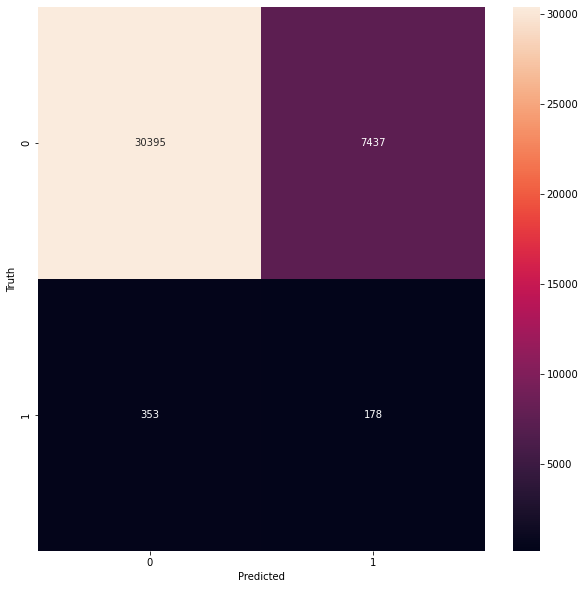

In [85]:
#Printing scores of Logistic regression
y_pred = clf.predict(x_test)
f1_LR=f1_score(y_test,y_pred, average='macro')

cm = confusion_matrix(y_test, y_pred)
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### F1 Score of Logistic Regression 

In [86]:
f1_LR

0.4650562313600644

Text(69.0, 0.5, 'Truth')

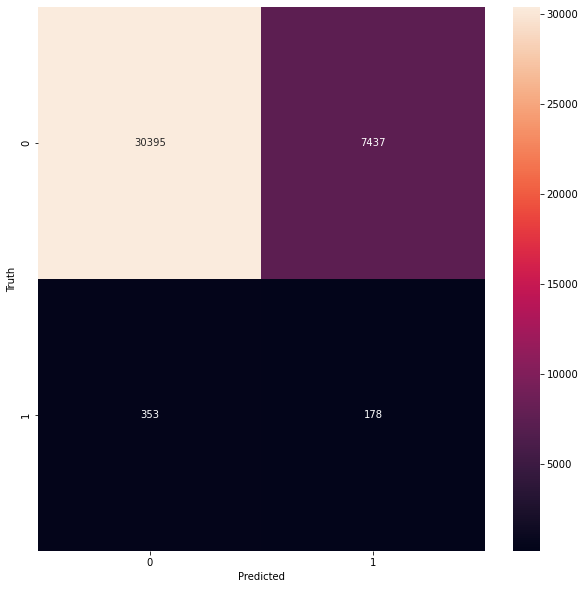

In [87]:
#Using KNN classifier
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf1.fit(X_res, y_res)
#Printing scores of KNN classifier
y_pred = clf1.predict(x_test)
f1_KNN=f1_score(y_test,y_pred, average='macro')

import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
f1_KNN

0.407827346673029

### Printing scores of K-NN using confusion matrix. 

Text(69.0, 0.5, 'Truth')

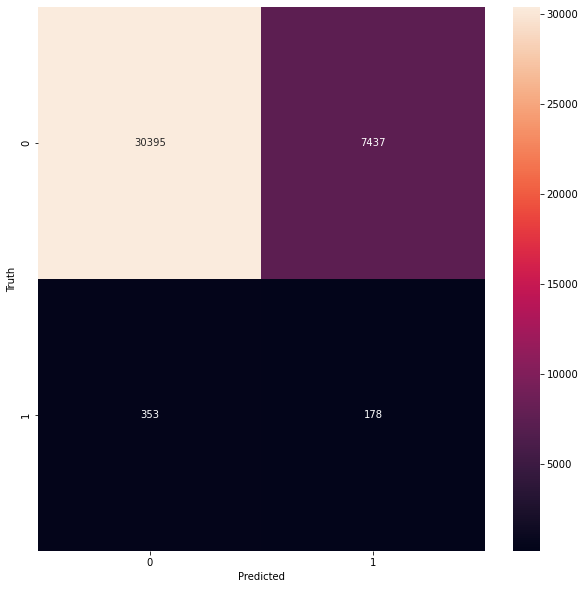

In [89]:
#Trying decision tree classifier
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cls.fit(X_res, y_res)
#Printing scores of decision tree classifier
y_pred = cls.predict(x_test)
f1_DT=f1_score(y_test,y_pred, average='macro')

import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### F1 Score of K-NN. 

In [90]:
f1_DT

0.47875486535018497

### Printing scores of Random Forest using confusion matrix. 

Text(33.0, 0.5, 'Truth')

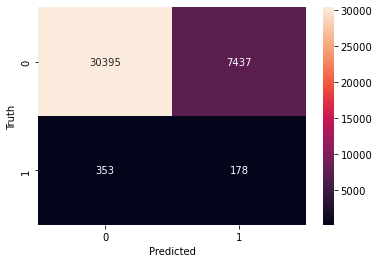

In [91]:
#Trying Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth= 10 , max_features= 6)
clf2.fit(X_res, y_res)
#Printing scores of Random forest classifier
y_pred = clf2.predict(x_test)
f1_RF=f1_score(y_test,y_pred, average='macro')

import seaborn as sn
#plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### F1 Score for Random forest 

In [92]:
f1_RF

0.5341094387552625

# Random Forest gives the highest Score.
# 

### printing scores of xgboost using confusion matrix and F1 score. 

In [93]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier( max_depth=4, random_state = 42, n_jobs = 4)
clf_xgb.fit(X_res, y_res)
y_pred = clf_xgb.predict(x_test)
f1_XG=f1_score(y_test,y_pred, average='macro')
f1_XG

C:\Users\syedn\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5237949799515679

Text(69.0, 0.5, 'Truth')

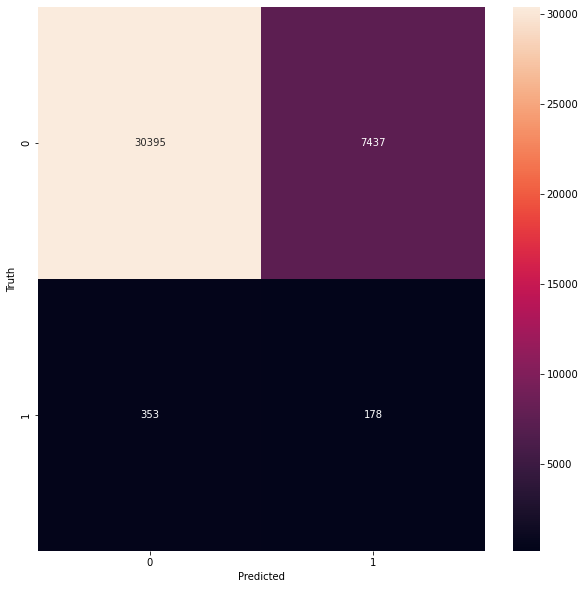

In [94]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Importing the Test data set. 

In [95]:
df_hold= pd.read_csv("df_holdout.csv")

C:\Users\syedn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [96]:
#dropping the columns not necessary in test data set.
df_final = df_hold.drop(columns=['Info_PepID', 'Info_organism_id', 'Info_protein_id', 'Info_pos',
       'Info_AA', 'Info_pubmed_id', 'Info_epitope_id', 'Info_host_id',
       'Info_nPos', 'Info_nNeg','Info_window','Info_cluster','Info_split'])

In [97]:
#adding a new column predicted_class which contains the predicted value of the test set.
df_final['Predicted_Class']=clf2.predict(df_final)

In [98]:
df_final

,feat_local_Entropy,feat_local_MolWeight,feat_local_AAtypes_Tiny,feat_local_AAtypes_Small,feat_local_AAtypes_Aliphatic,feat_local_AAtypes_Aromatic,feat_local_AAtypes_NonPolar,feat_local_AAtypes_Polar,feat_local_AAtypes_Charged,feat_local_AAtypes_Basic,...,feat_local_ScalesGap_scl3.1.lag3,feat_local_ScalesGap_scl4.1.lag3,feat_local_ScalesGap_scl5.1.lag3,feat_local_ScalesGap_scl3.2.lag3,feat_local_ScalesGap_scl4.2.lag3,feat_local_ScalesGap_scl5.2.lag3,feat_local_ScalesGap_scl4.3.lag3,feat_local_ScalesGap_scl5.3.lag3,feat_local_ScalesGap_scl5.4.lag3,Predicted_Class
0,2.440224,1985.11,0.400000,0.400000,0.266667,0.133333,0.466667,0.533333,0.266667,0.000000,...,10.212623,24.889555,-8.141488,2.648292,7.236000,1.899302,10.442917,-10.245384,-1.101085,-1
1,2.573557,1925.01,0.466667,0.466667,0.266667,0.066667,0.400000,0.600000,0.266667,0.000000,...,16.508058,23.589776,-2.984973,-0.528107,9.714819,0.773754,14.709717,-12.379972,-0.935527,-1
2,2.606239,1866.97,0.533333,0.533333,0.333333,0.066667,0.466667,0.533333,0.200000,0.000000,...,11.838805,26.953382,-4.866418,-0.370650,9.601392,0.837201,11.795860,-10.750096,-5.336032,-1
3,2.789898,1866.03,0.533333,0.533333,0.333333,0.066667,0.466667,0.533333,0.200000,0.066667,...,7.961824,31.299999,-5.170461,2.175602,6.076406,0.494105,11.670982,-7.979119,-4.995618,-1
4,2.789898,1866.03,0.533333,0.533333,0.333333,0.066667,0.466667,0.533333,0.200000,0.066667,...,17.556689,33.671912,1.716937,2.606437,4.843954,1.367897,11.934643,-7.631075,2.901006,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115115,3.323231,2034.24,0.266667,0.533333,0.333333,0.266667,0.533333,0.466667,0.133333,0.133333,...,-24.470667,-27.722282,4.410659,4.267216,7.622234,1.085596,-6.350201,1.682633,2.062462,-1
115116,3.139572,2007.21,0.333333,0.600000,0.333333,0.266667,0.533333,0.466667,0.133333,0.133333,...,-13.726349,-30.885573,6.225646,2.862018,9.714138,0.613732,-0.712953,0.986394,1.605931,-1
115117,3.139572,1957.19,0.333333,0.600000,0.400000,0.200000,0.533333,0.466667,0.133333,0.133333,...,-7.920183,-15.111873,8.616273,2.059419,7.234419,0.299683,3.678106,1.286302,1.486408,-1
115118,3.006239,2007.26,0.266667,0.533333,0.400000,0.266667,0.533333,0.466667,0.200000,0.200000,...,-1.422266,-12.721278,12.975264,0.252933,7.471802,-1.365325,-0.107333,0.408510,2.378515,-1


In [99]:
df3 = df_hold.filter(['Info_protein_id','Info_pos'])

In [100]:
df3['Predicted_Class']=df_final['Predicted_Class']
df3

,Info_protein_id,Info_pos,Predicted_Class
0,EAN87014.1,1,-1
1,EAN87014.1,2,-1
2,EAN87014.1,3,-1
3,EAN87014.1,4,-1
4,EAN87014.1,5,-1
...,...,...,...
115115,AAC47720.1,555,-1
115116,AAC47720.1,556,-1
115117,AAC47720.1,557,-1
115118,AAC47720.1,558,-1


## Exporting the final results obtained to csv file.

In [101]:
df3.to_csv('final_output_class_prediction.csv')